# Deep Learning with keras. NCAA men's basketball ATS Prediction

In [99]:
# Import libraries
import pandas as pd
import numpy as np
import requests
import lxml.html as lh
import pandas as pd
import numpy as np 
#from bs4 import BeautifulSoup
from requests import get
import urllib.request
import csv

import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn import tree
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import random
from random import seed

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(12,8), 'figure.dpi':100})

In [100]:
seed = np.random.seed(123) #for reproducibility

In [101]:
ncaa_df1 = pd.read_csv('ncaa_basketball_complete.csv')
ncaa_df1.head()

,year,season,date,True Date,rot,odd,vh,vis_home,ateam_ly_rank,ateam_ty_rank,...,Luck9,Luck_Rank10,Strength of Schedule AdjEM11,Strength of Schedule AdjEM_Rank12,Strength of Schedule OppO13,Strength of Schedule OppO_Rank14,Strength of Schedule OppD15,Strength of Schedule OppD_Rank16,NCSOS AdjEM17,NCSOS AdjEM_Rank18
0,2015,1,1113,42321,723,True,V,V,67.0,92.0,...,10.0,0.005,173.0,10.59,6.0,109.0,18.0,98.5,4.0,-1.18
1,2015,1,1113,42321,727,True,V,V,202.0,249.0,...,59.0,-0.105,344.0,0.30,135.0,103.4,195.0,103.1,107.0,4.53
2,2015,1,1113,42321,729,True,V,V,129.0,250.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1113,42321,731,True,V,V,267.0,199.0,...,301.0,-0.078,328.0,3.33,90.0,105.8,94.0,102.5,94.0,-0.58
4,2015,1,1113,42321,733,True,V,V,222.0,168.0,...,105.0,0.012,156.0,8.21,31.0,108.3,35.0,100.1,28.0,-2.53


In [102]:
ncaa_df1.columns

Index(['year', 'season', 'date', 'True Date', 'rot', 'odd', 'vh', 'vis_home',
       'ateam_ly_rank', 'ateam_ty_rank', 'away_team', 'awayteam_id',
       'Away Team Winning Streak', 'Away Team Losing Streak', 'first',
       'second', 'final', 'open', 'close', 'ml', 'sec_half_line',
       'away_spread', 'away_covered', 'final_away_gap_betting', 'over_under',
       'winner', 'loser', 'points', 'year1', 'date1', 'rot1', 'odd1', 'vh1',
       'vis_home1', 'hteam_ly_rank', 'hteam_ty_rank', 'home_team',
       'hometeam_id', 'Home Team Winning Streak', 'Home Team Losing Streak',
       'first1', 'second1', 'final1', 'open1', 'close1', 'ml1',
       'sec_half_lines1', 'AdjEM', 'AdjO', 'AdjO_Rank', 'AdjD', 'AdjD_Rank',
       'AdjT', 'AdjT_Rank', 'Luck', 'Luck_Rank', 'Strength of Schedule AdjEM',
       'Strength of Schedule AdjEM_Rank', 'Strength of Schedule OppO',
       'Strength of Schedule OppO_Rank', 'Strength of Schedule OppD',
       'Strength of Schedule OppD_Rank', 'NCSOS AdjEM', 

In [103]:
ncaa_df = ncaa_df1.sample(frac=1).reset_index(drop=True)

In [104]:
ncaa_df.head()

,year,season,date,True Date,rot,odd,vh,vis_home,ateam_ly_rank,ateam_ty_rank,...,Luck9,Luck_Rank10,Strength of Schedule AdjEM11,Strength of Schedule AdjEM_Rank12,Strength of Schedule OppO13,Strength of Schedule OppO_Rank14,Strength of Schedule OppD15,Strength of Schedule OppD_Rank16,NCSOS AdjEM17,NCSOS AdjEM_Rank18
0,2017,2,207,42773,717,True,V,V,230.0,249.0,...,176.0,0.024,122.0,-1.92,188.0,104.4,160.0,106.3,225.0,-5.91
1,2018,3,215,43146,555,True,V,V,246.0,178.0,...,242.0,-0.014,215.0,-0.77,156.0,104.5,175.0,105.2,150.0,-2.63
2,2018,4,1211,43445,308215,True,V,V,327.0,295.0,...,278.0,0.042,70.0,-2.83,221.0,102.7,264.0,105.6,170.0,-3.19
3,2018,4,1127,43431,513,True,V,V,191.0,307.0,...,27.0,-0.023,238.0,-0.32,145.0,106.6,94.0,106.9,252.0,2.87
4,2017,2,302,42796,721,True,V,V,193.0,237.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
away_spread_cov = ncaa_df[['Home Team Losing Streak','Home Team Winning Streak', 'Away Team Losing Streak','Away Team Winning Streak', 
                           'away_spread','away_covered','ateam_ly_rank', 'ateam_ty_rank','hteam_ly_rank', 'hteam_ty_rank','AdjEM','AdjEM2']]

In [106]:
away_spread_cov.head()

,Home Team Losing Streak,Home Team Winning Streak,Away Team Losing Streak,Away Team Winning Streak,away_spread,away_covered,ateam_ly_rank,ateam_ty_rank,hteam_ly_rank,hteam_ty_rank,AdjEM,AdjEM2
0,1,0,0,3,7.5,1,230.0,249.0,179.0,141.0,-7.16,1.68
1,2,0,0,2,4.5,1,246.0,178.0,260.0,132.0,-0.43,3.01
2,0,1,4,0,7.5,1,327.0,295.0,262.0,230.0,-11.71,-6.00
3,0,2,2,0,5.5,0,191.0,307.0,59.0,245.0,-12.78,-7.43
4,2,0,0,1,1.5,1,193.0,237.0,338.0,251.0,-6.35,NaN


In [107]:
#current_season = pd.read_csv('ncaa_cs_complete.csv')
#current_season.head()

In [108]:
#current_season = current_season.sample(frac=1).reset_index(drop=True)

In [109]:
#cs = current_season[['Home Team Losing Streak','Home Team Winning Streak', 'Away Team Losing Streak','Away Team Winning Streak', 
#                           'away_spread','away_covered','ateam_ly_rank', 'ateam_ty_rank','hteam_ly_rank', 'hteam_ty_rank']]

In [110]:
#cs.isna().sum()

In [111]:
#cs_preds = model.predict(cs)
#cs_preds = [round(x[0]) for x in cs_preds]
#cs_probs = model.predict(cs)
#cs['prob_ci'] = cs_probs
#cs['asc_pred'] = cs_preds
#cs.head()

In [112]:
#current_season['asc_pred'] = cs['asc_pred']
#current_season['prob_ci'] = cs['prob_ci']
#current_season.head()

In [113]:
#accuracy_score(current_season['away_covered'], current_season['asc_pred'])

In [114]:
#current_season.to_csv('cs_pred_DL.csv')

In [115]:
#_ = plt.hist(current_season['prob_ci'],bins = 10)
#_ = plt.ylabel("Frequency")
#_ = plt.xlabel("prob_ci")
#plt.show()

# Lets add the 20-21 and 21-22 season

In [116]:
todays_games = pd.read_excel('NCAA Basketball_temp.xlsx')
todays_games1 = pd.read_excel('NCAA Basketball21_22.xlsx')
todays_games = todays_games.append(todays_games1)


In [117]:
todays_games.head()

,AdjD_Rank,AdjD_Rank6,AdjEM,AdjEM2,AdjO_Rank,AdjO_Rank4,AdjT_Rank,AdjT_Rank8,Away Team,Away Team Losing Streak,...,ateam_ty_rank,away_covered,away_spread,awayteam_id,hometeam_id,hteam_ly_rank,hteam_ty_rank,ml,ml1,over_under
0,300.0,66.0,-2.88,14.88,129.0,56.0,113.0,156.0,Oakland,0.0,...,210.0,0.0,16.0,289.0,475.0,45.0,59.0,1000.0,-2000.0,143.5
1,297.0,221.0,-10.67,2.79,269.0,106.0,231.0,285.0,NorthDakota,0.0,...,297.0,0.0,6.5,274.0,221.0,229.0,148.0,235.0,-275.0,139.5
2,222.0,59.0,-8.48,7.53,291.0,173.0,289.0,316.0,WesternMichigan,0.0,...,260.0,1.0,18.5,465.0,45.0,25.0,132.0,1200.0,-3000.0,125.0
3,269.0,NaN,-5.80,NaN,219.0,NaN,76.0,NaN,WesternCarolina,0.0,...,270.0,NaN,-4.0,462.0,273.0,312.0,200.0,-175.0,155.0,156.5
4,117.0,123.0,15.52,-0.45,20.0,243.0,265.0,309.0,Drake,0.0,...,48.0,1.0,4.0,100.0,173.0,90.0,180.0,160.0,-180.0,132.5


In [118]:
todays_games.isna().sum()

AdjD_Rank                    641
AdjD_Rank6                   233
AdjEM                        641
AdjEM2                       233
AdjO_Rank                    641
AdjO_Rank4                   233
AdjT_Rank                    641
AdjT_Rank8                   233
Away Team                      0
Away Team Losing Streak      926
Away Team Winning Streak     926
Date                           1
Home Team                      0
Home Team Losing Streak      706
Home Team Winning Streak     706
ateam_ly_rank                626
ateam_ty_rank                606
away_covered                4033
away_spread                  664
awayteam_id                  540
hometeam_id                  180
hteam_ly_rank                211
hteam_ty_rank                201
ml                          5977
ml1                         5977
over_under                   759
dtype: int64

In [119]:
todays_games = todays_games.dropna(subset=['Away Team Winning Streak', 'Home Team Winning Streak','Away Team Losing Streak','Away Team Winning Streak',
                                           'away_spread','ateam_ly_rank', 'ateam_ty_rank','hteam_ly_rank','hteam_ty_rank','AdjEM','AdjEM2','away_covered'])

In [120]:
todays_games.isna().sum()

AdjD_Rank                      0
AdjD_Rank6                     0
AdjEM                          0
AdjEM2                         0
AdjO_Rank                      0
AdjO_Rank4                     0
AdjT_Rank                      0
AdjT_Rank8                     0
Away Team                      0
Away Team Losing Streak        0
Away Team Winning Streak       0
Date                           0
Home Team                      0
Home Team Losing Streak        0
Home Team Winning Streak       0
ateam_ly_rank                  0
ateam_ty_rank                  0
away_covered                   0
away_spread                    0
awayteam_id                    4
hometeam_id                    8
hteam_ly_rank                  0
hteam_ty_rank                  0
ml                          1958
ml1                         1958
over_under                    34
dtype: int64

In [121]:
today = todays_games

In [122]:
games = today[['Home Team Losing Streak','Home Team Winning Streak', 'Away Team Losing Streak','Away Team Winning Streak', 
                           'away_spread','away_covered','ateam_ly_rank', 'ateam_ty_rank','hteam_ly_rank', 'hteam_ty_rank','AdjEM','AdjEM2']]

In [123]:
games.isna().sum()

Home Team Losing Streak     0
Home Team Winning Streak    0
Away Team Losing Streak     0
Away Team Winning Streak    0
away_spread                 0
away_covered                0
ateam_ly_rank               0
ateam_ty_rank               0
hteam_ly_rank               0
hteam_ty_rank               0
AdjEM                       0
AdjEM2                      0
dtype: int64

In [124]:
away_spread_cov = away_spread_cov.append(games)

In [125]:
away_spread_cov.head()

,Home Team Losing Streak,Home Team Winning Streak,Away Team Losing Streak,Away Team Winning Streak,away_spread,away_covered,ateam_ly_rank,ateam_ty_rank,hteam_ly_rank,hteam_ty_rank,AdjEM,AdjEM2
0,1.0,0.0,0.0,3.0,7.5,1.0,230.0,249.0,179.0,141.0,-7.16,1.68
1,2.0,0.0,0.0,2.0,4.5,1.0,246.0,178.0,260.0,132.0,-0.43,3.01
2,0.0,1.0,4.0,0.0,7.5,1.0,327.0,295.0,262.0,230.0,-11.71,-6.00
3,0.0,2.0,2.0,0.0,5.5,0.0,191.0,307.0,59.0,245.0,-12.78,-7.43
4,2.0,0.0,0.0,1.0,1.5,1.0,193.0,237.0,338.0,251.0,-6.35,NaN


In [126]:
away_spread_cov.shape

(19332, 12)

In [127]:
away_spread_cov.isna().sum()

Home Team Losing Streak        0
Home Team Winning Streak       0
Away Team Losing Streak        0
Away Team Winning Streak       0
away_spread                    0
away_covered                   0
ateam_ly_rank                464
ateam_ty_rank                457
hteam_ly_rank                408
hteam_ty_rank                392
AdjEM                       2368
AdjEM2                      2296
dtype: int64

In [128]:
away_spread_cov = away_spread_cov.dropna()

In [129]:
away_spread_cov.isna().sum()

Home Team Losing Streak     0
Home Team Winning Streak    0
Away Team Losing Streak     0
Away Team Winning Streak    0
away_spread                 0
away_covered                0
ateam_ly_rank               0
ateam_ty_rank               0
hteam_ly_rank               0
hteam_ty_rank               0
AdjEM                       0
AdjEM2                      0
dtype: int64

In [130]:
away_spread_cov.shape

(14992, 12)

In [131]:
#import seaborn as sns
#corr = away_spread_cov.corr()
#sns.heatmap(corr,xticklabels=corr.columns.values, yticklabels=corr.columns.values)


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(15,12), 'figure.dpi':300})

corr = away_spread_cov.corr()
corr.style.background_gradient(cmap='gray').set_precision(2)

,Home Team Losing Streak,Home Team Winning Streak,Away Team Losing Streak,Away Team Winning Streak,away_spread,away_covered,ateam_ly_rank,ateam_ty_rank,hteam_ly_rank,hteam_ty_rank,AdjEM,AdjEM2
Home Team Losing Streak,1,-0.35,-0.31,0.36,-0.4,0.28,-0.064,-0.11,0.21,0.31,0.088,-0.22
Home Team Winning Streak,-0.35,1,0.22,-0.3,0.36,-0.23,0.011,0.029,-0.22,-0.3,-0.029,0.25
Away Team Losing Streak,-0.31,0.22,1,-0.36,0.34,-0.23,0.21,0.3,-0.011,-0.038,-0.22,0.012
Away Team Winning Streak,0.36,-0.3,-0.36,1,-0.39,0.29,-0.21,-0.29,0.06,0.087,0.24,-0.05
away_spread,-0.4,0.36,0.34,-0.39,1,-0.0068,0.35,0.44,-0.36,-0.45,-0.33,0.34
away_covered,0.28,-0.23,-0.23,0.29,-0.0068,1,0.0025,-0.023,0.028,0.044,0.018,-0.044
ateam_ly_rank,-0.064,0.011,0.21,-0.21,0.35,0.0025,1,0.8,0.43,0.43,-0.56,-0.31
ateam_ty_rank,-0.11,0.029,0.3,-0.29,0.44,-0.023,0.8,1,0.44,0.46,-0.69,-0.33
hteam_ly_rank,0.21,-0.22,-0.011,0.06,-0.36,0.028,0.43,0.44,1,0.81,-0.3,-0.58
hteam_ty_rank,0.31,-0.3,-0.038,0.087,-0.45,0.044,0.43,0.46,0.81,1,-0.31,-0.71


In [132]:
seed = np.random.seed(123) #for reproducibility

In [133]:
y = away_spread_cov['away_covered']
X = away_spread_cov.drop('away_covered', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state= seed) # 67% training, 33% test

In [134]:
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

# create model
model = Sequential()
model.add(Dense(484, activation='relu',input_shape=(11,)))
model.add(Dense(242, activation='relu'))
model.add(Dense(121, activation='relu'))
model.add(Dense(121, activation='relu'))
model.add(Dense(77, activation='relu'))
model.add(Dense(44, activation='relu'))



# output layer
model.add(Dense(1, activation='sigmoid', kernel_initializer = 'normal'))



In [135]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [136]:
estimator = model

Train on 10044 samples, validate on 4948 samples
Epoch 1/7
10044/10044 [==============================] - 1s 69us/step - loss: 0.7093 - accuracy: 0.5191 - val_loss: 0.7353 - val_accuracy: 0.5049
Epoch 2/7
10044/10044 [==============================] - 0s 28us/step - loss: 0.6925 - accuracy: 0.5467 - val_loss: 0.6798 - val_accuracy: 0.5738
Epoch 3/7
10044/10044 [==============================] - 0s 29us/step - loss: 0.6655 - accuracy: 0.6132 - val_loss: 0.7027 - val_accuracy: 0.5645
Epoch 4/7
10044/10044 [==============================] - 0s 30us/step - loss: 0.6267 - accuracy: 0.6636 - val_loss: 0.5874 - val_accuracy: 0.7061
Epoch 5/7
10044/10044 [==============================] - 0s 26us/step - loss: 0.5840 - accuracy: 0.7007 - val_loss: 0.5714 - val_accuracy: 0.7165
Epoch 6/7
10044/10044 [==============================] - 0s 29us/step - loss: 0.5707 - accuracy: 0.7145 - val_loss: 0.5580 - val_accuracy: 0.7235
Epoch 7/7
10044/10044 [==============================] - 0s 26us/step - los

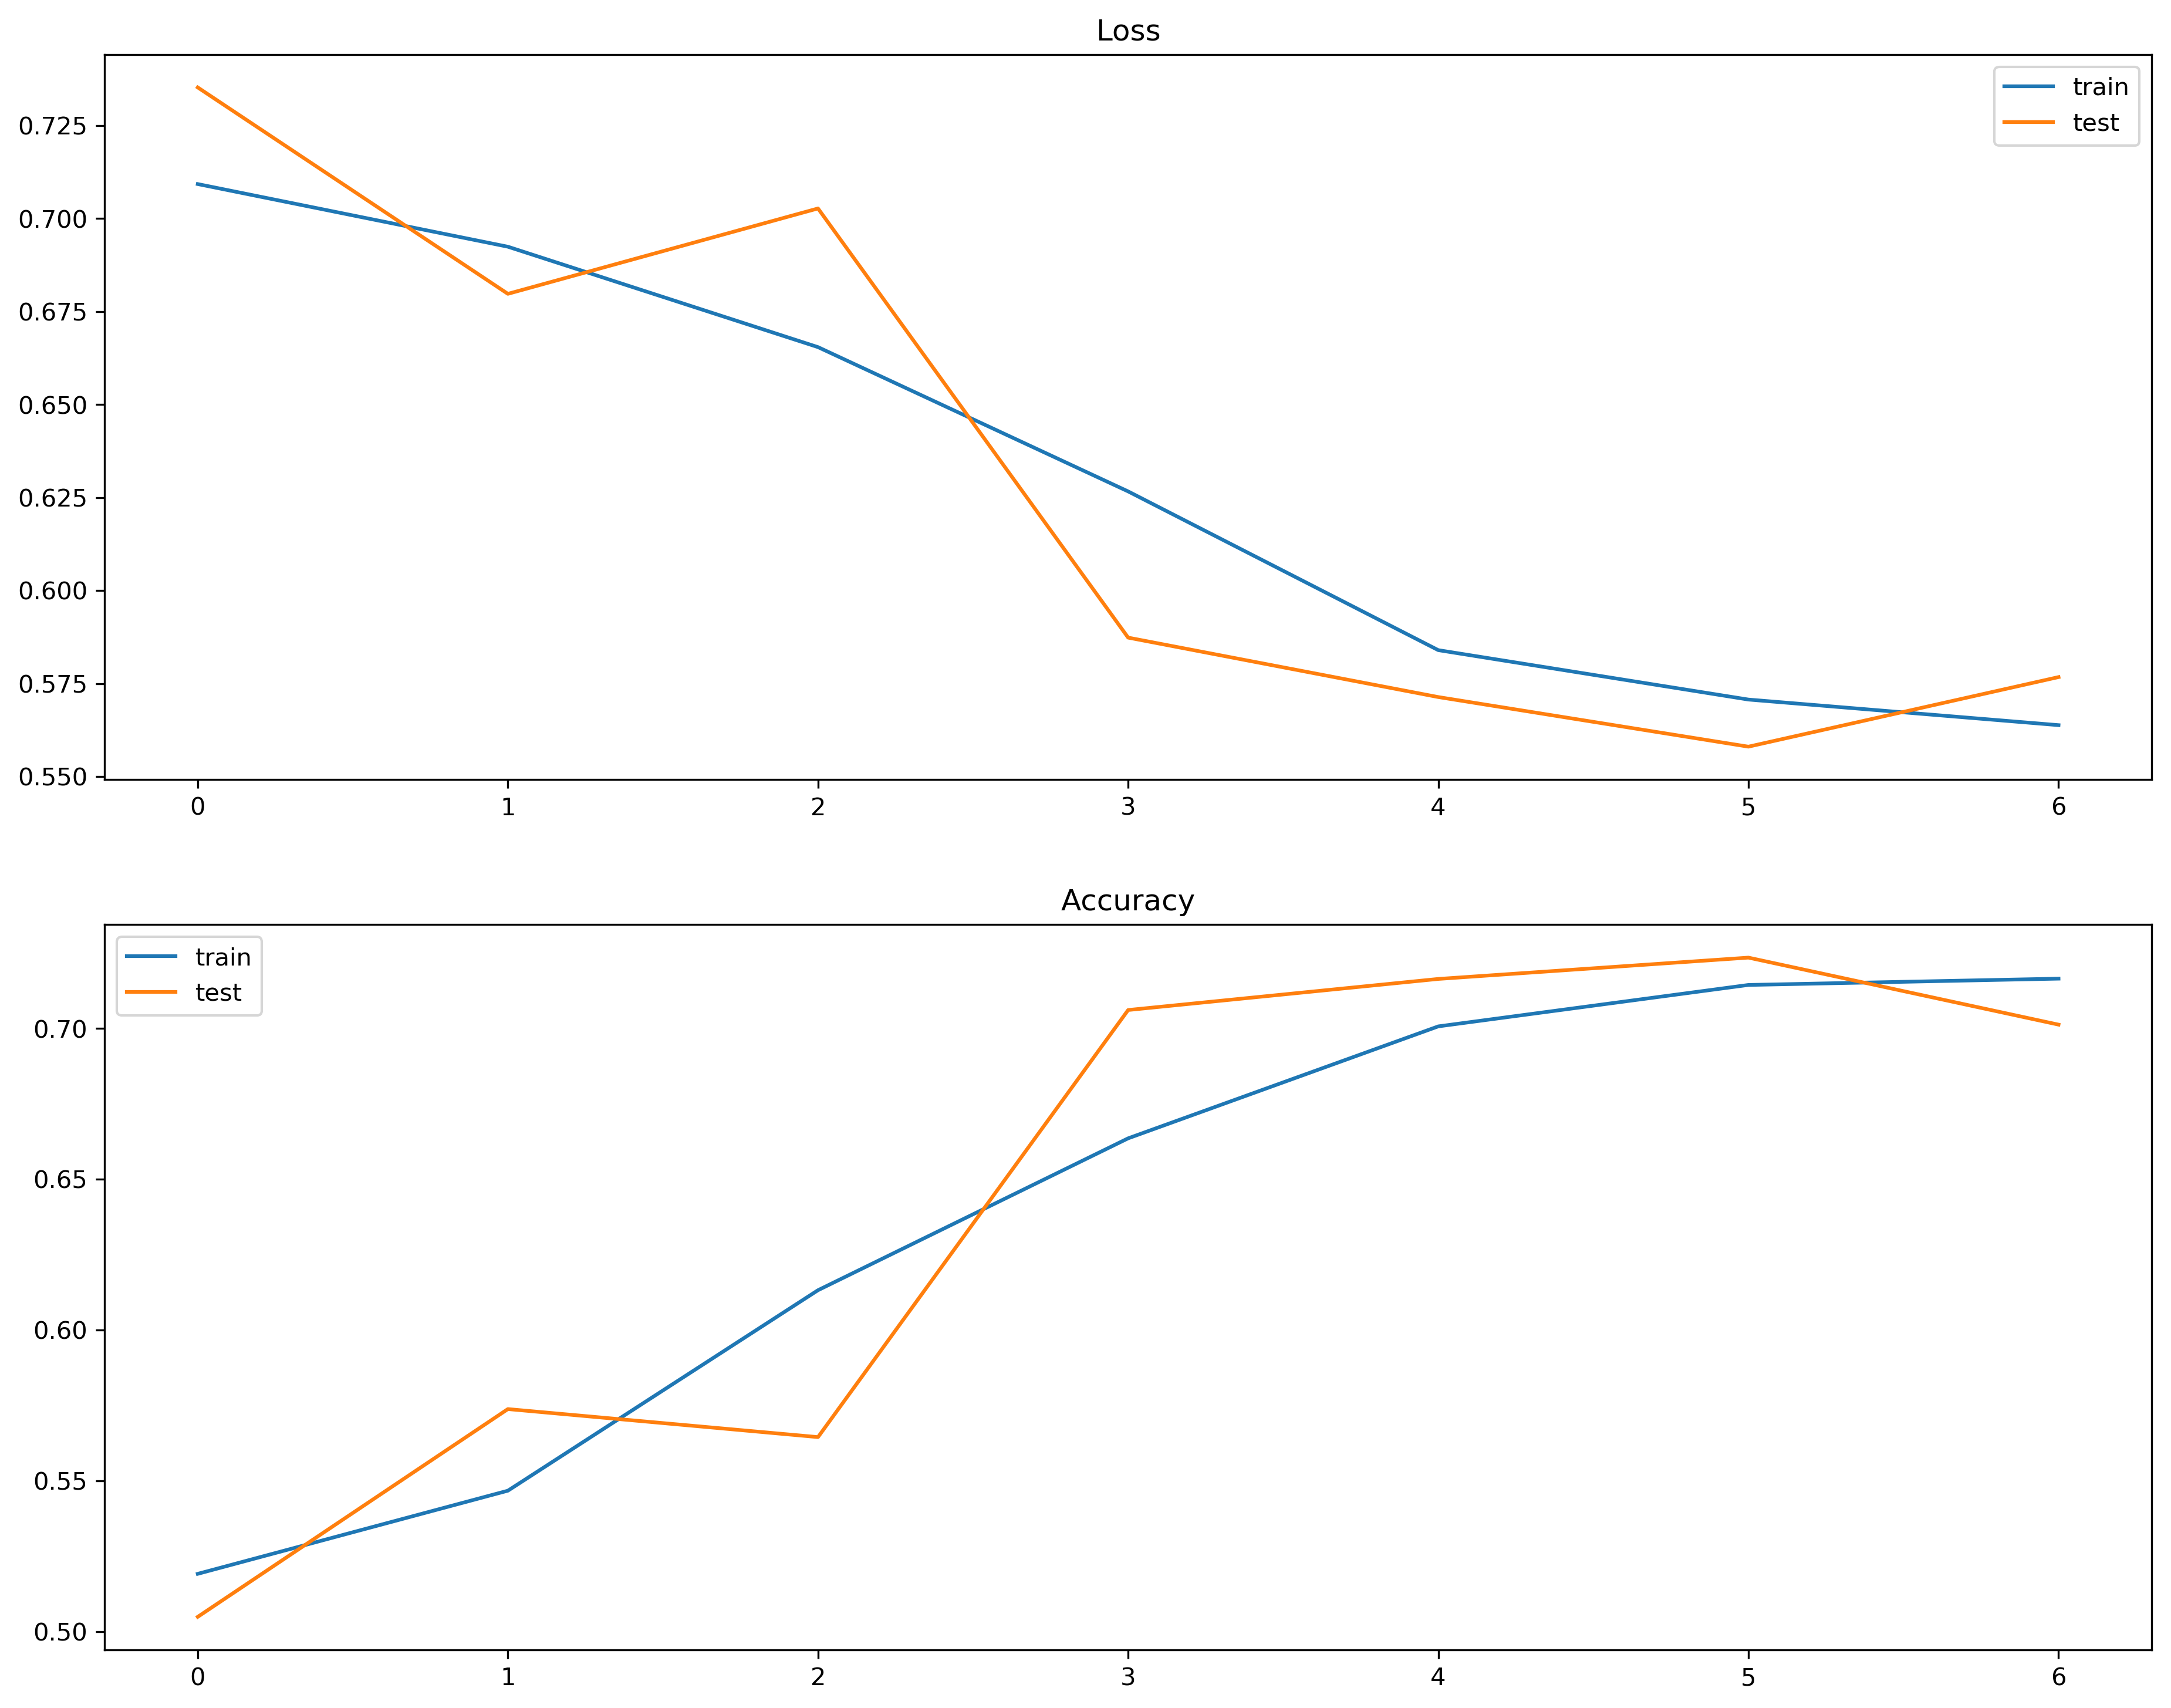

In [137]:
from keras.optimizers import SGD
from matplotlib import pyplot

history = estimator.fit(X_train, y_train, epochs=7, batch_size=350, validation_data=(X_test, y_test))
# evaluate the model
_, train_acc = estimator.evaluate(X_train, y_train, verbose=0)
_, test_acc = estimator.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [138]:
# ORIGINAL MODEL FROM END OF 20-21 SEASON

##### create estimator
#from keras.wrappers.scikit_learn import KerasClassifier
#estimator = model
#estimator=KerasClassifier(build_fn=model,epochs=6, batch_size=180,verbose=2)
#estimator.fit(X_train,y_train,epochs=6,batch_size=310,verbose=2)
#estimator.fit(X_train,y_train,epochs=6,batch_size=450,verbose=2)
#estimator.fit(X_train,y_train,epochs=9,batch_size=800,verbose=2)

In [139]:
#from sklearn.model_selection import KFold
#kfold = KFold(n_splits = 5, shuffle = True)
#results = cross_val_score(estimator, X_test, y_test, cv=kfold)
#print("Results: %.2f%% (%.2f%%) MSE" % (results.mean()*100, results.std()*100))

In [140]:
##### FIRST BREAK #####

In [141]:
y_pred=estimator.predict(X_test)
y_pred = [round(x[0]) for x in y_pred]


In [142]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1721  750]
 [ 728 1749]]


In [143]:
accuracy_score(y_test,y_pred)

0.7012934518997574

In [144]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

In [145]:
# Precision 
precision_score(y_test, y_pred)

0.6998799519807923

In [146]:
# Recall
recall_score(y_test, y_pred)

0.7060960839725474

In [147]:
# F1 score
f1_score(y_test,y_pred)

0.7029742765273312

In [148]:
model = estimator

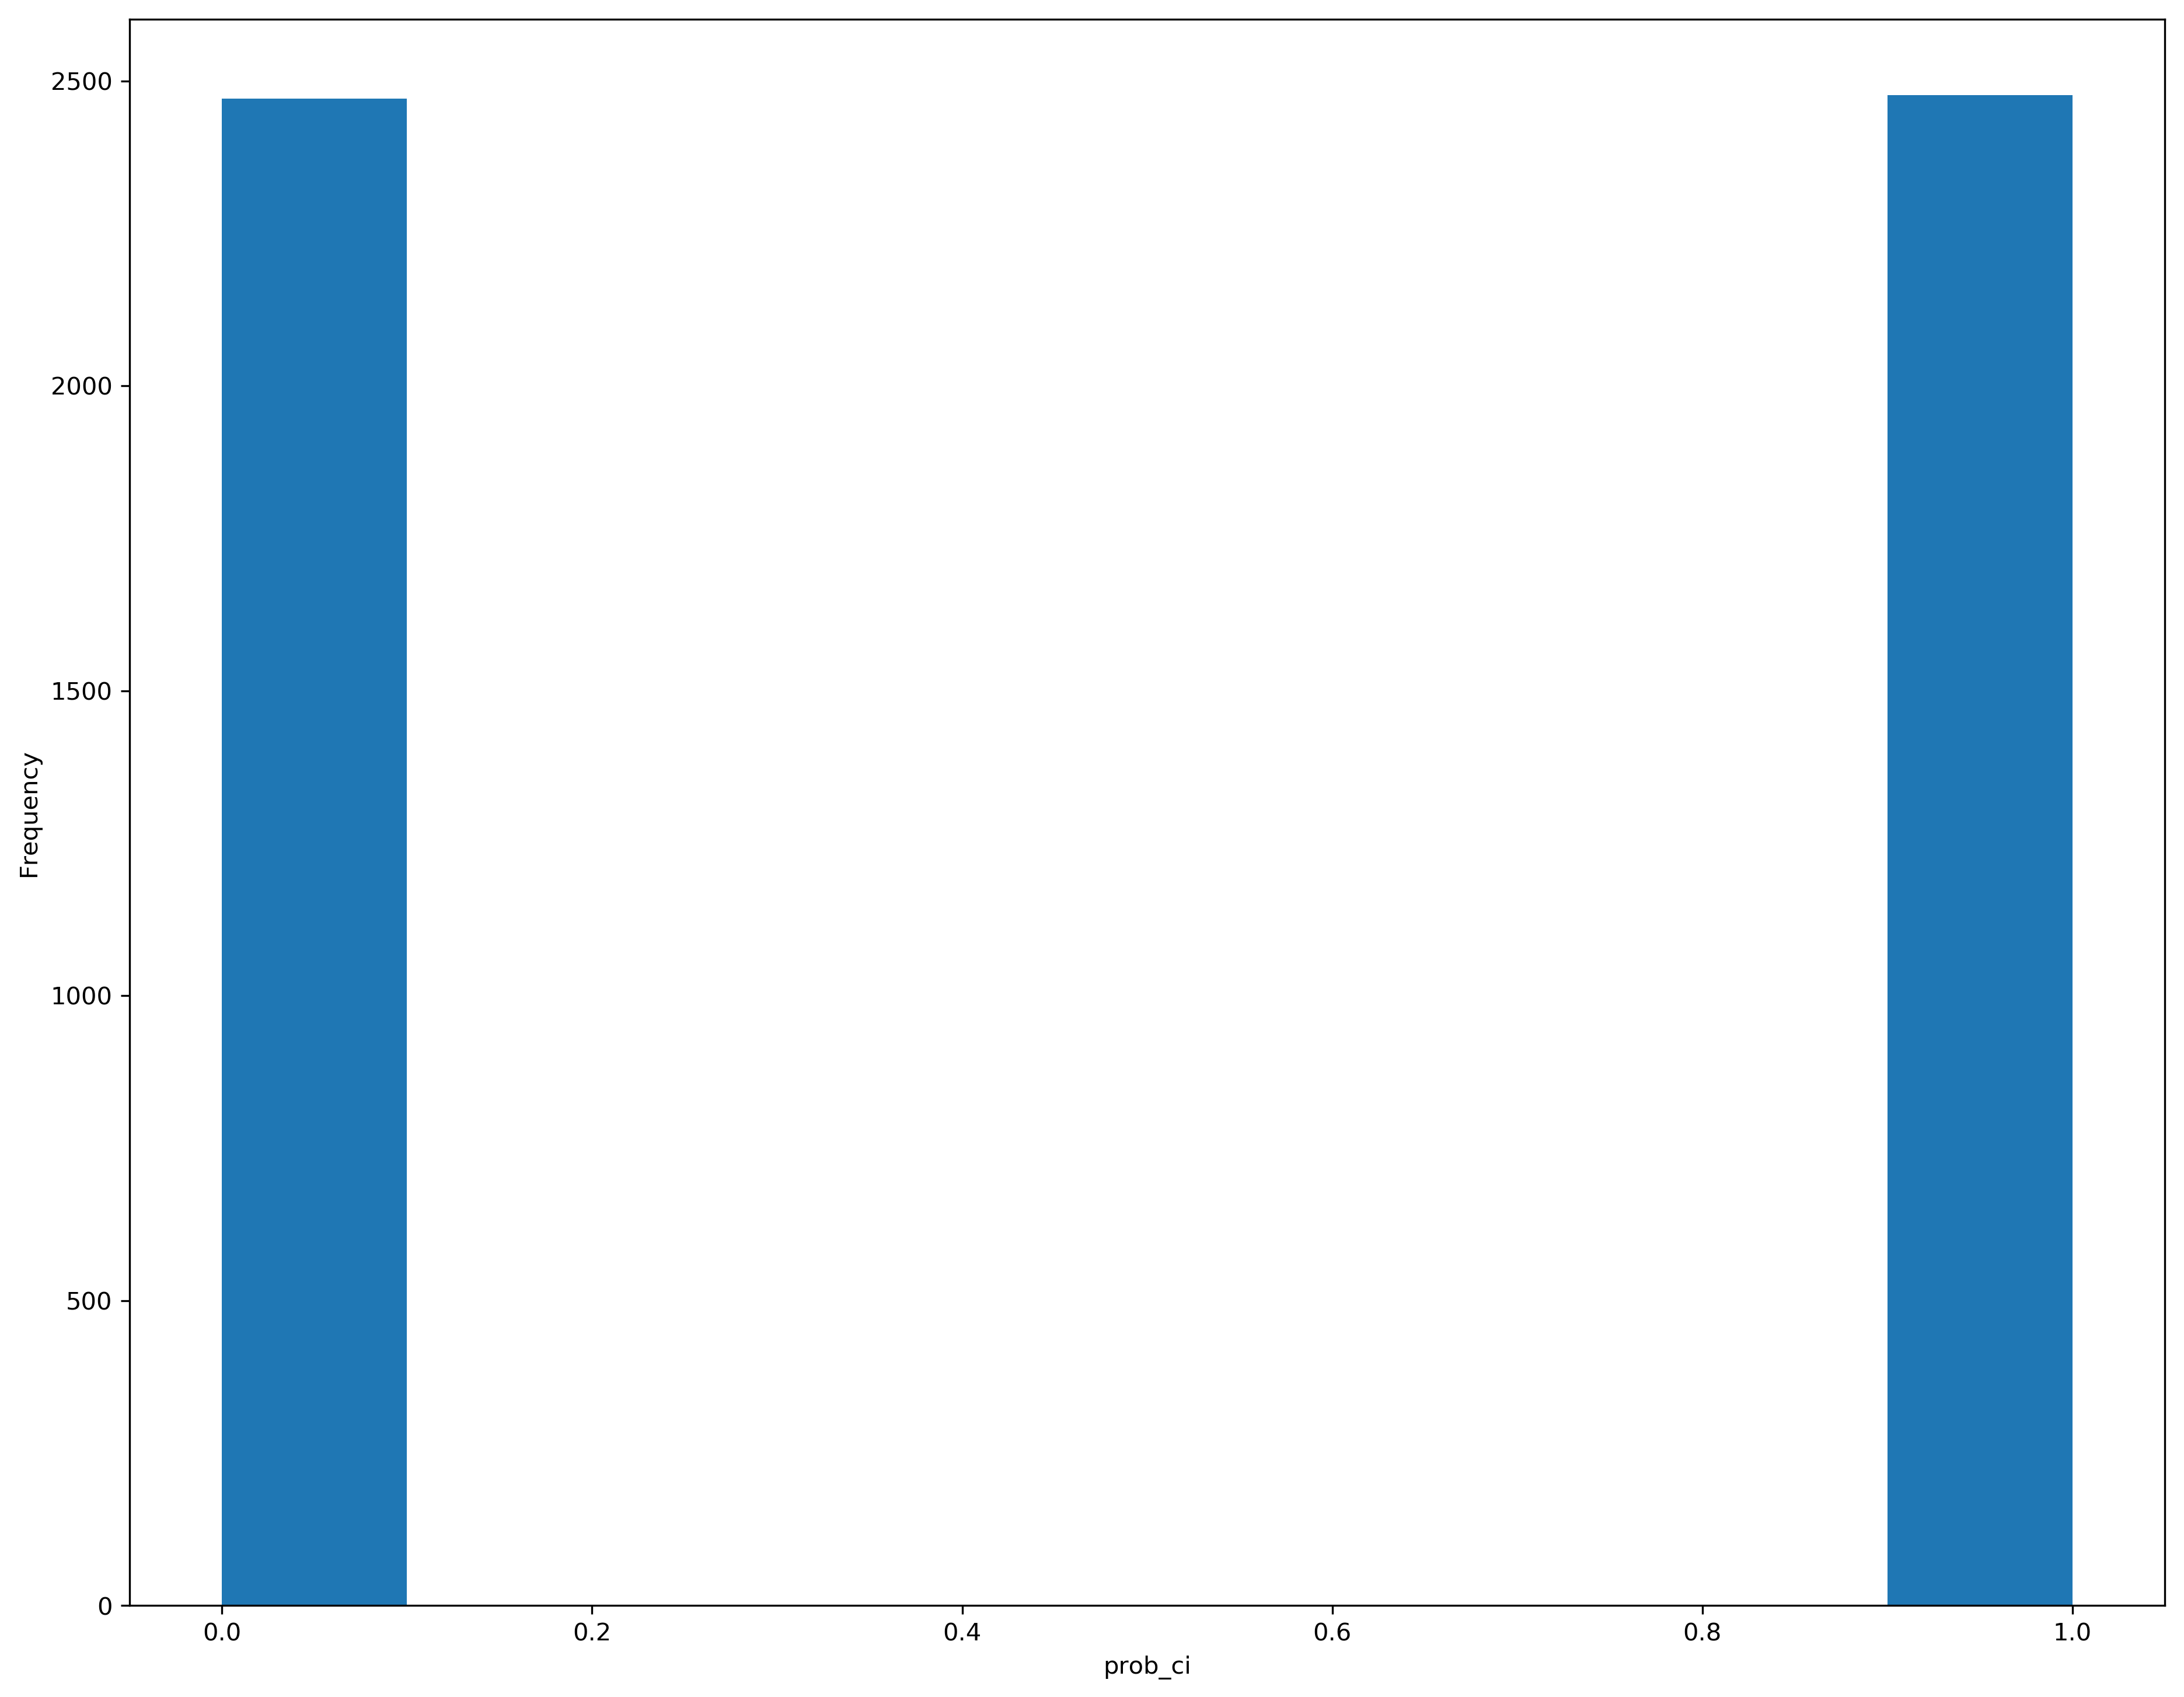

In [149]:
_ = plt.hist(y_test,bins = 10)
_ = plt.ylabel("Frequency")
_ = plt.xlabel("prob_ci")
plt.show()

# Lets Predict on the 21-22 Season

In [150]:
todays_games1 = pd.read_excel('NCAA_Basketball_22_23.xlsx')
todays_games1.head()

,Date,Away Team,Home Team,awayteam_id,Away Team Winning Streak,Away Team Losing Streak,ateam_ly_rank,ateam_ty_rank,hteam_ly_rank,hteam_ty_rank,hometeam_id,Home Team Winning Streak,Home Team Losing Streak,away_spread,AdjEM,AdjEM2
0,2023-01-21,Florida State,Pittsburgh,122.0,1.0,0.0,24.0,173.0,146.0,62.0,309.0,2.0,0.0,7.5,-0.08,12.80
1,2023-01-21,Miami Florida,Duke,220.0,0.0,1.0,83.0,0.0,10.0,29.0,102.0,1.0,0.0,6.0,15.30,16.82
2,2023-01-21,East Tennessee State,Chattanooga,106.0,0.0,2.0,142.0,258.0,156.0,131.0,68.0,0.0,2.0,8.0,-7.42,3.43
3,2023-01-21,Marshall,Arkansas State,207.0,4.0,0.0,111.0,72.0,183.0,321.0,18.0,0.0,6.0,-10.5,10.70,-12.83
4,2023-01-21,James Madison,Southern Miss,170.0,2.0,0.0,181.0,90.0,191.0,116.0,367.0,2.0,0.0,1.5,7.97,4.97


In [151]:
todays_games1.isna().sum()

Date                          0
Away Team                     0
Home Team                     0
awayteam_id                  51
Away Team Winning Streak     66
Away Team Losing Streak      66
ateam_ly_rank               196
ateam_ty_rank               196
hteam_ly_rank               205
hteam_ty_rank               204
hometeam_id                  60
Home Team Winning Streak     70
Home Team Losing Streak      70
away_spread                 273
AdjEM                        55
AdjEM2                       54
dtype: int64

In [152]:
todays_games1 = todays_games1.dropna(subset=['Away Team Winning Streak', 'Home Team Winning Streak', 'away_spread','AdjEM','AdjEM2','ateam_ly_rank', 'ateam_ty_rank','hteam_ly_rank', 'hteam_ty_rank'])

In [153]:
todays_games1.isna().sum()

Date                        0
Away Team                   0
Home Team                   0
awayteam_id                 2
Away Team Winning Streak    0
Away Team Losing Streak     0
ateam_ly_rank               0
ateam_ty_rank               0
hteam_ly_rank               0
hteam_ty_rank               0
hometeam_id                 6
Home Team Winning Streak    0
Home Team Losing Streak     0
away_spread                 0
AdjEM                       0
AdjEM2                      0
dtype: int64

In [154]:
today1 = todays_games1

In [155]:
games1 = today1[['Home Team Losing Streak','Home Team Winning Streak', 'Away Team Losing Streak','Away Team Winning Streak',  
               'away_spread','ateam_ly_rank', 'ateam_ty_rank','hteam_ly_rank', 'hteam_ty_rank','AdjEM','AdjEM2']]

In [156]:
games1.isna().sum()

Home Team Losing Streak     0
Home Team Winning Streak    0
Away Team Losing Streak     0
Away Team Winning Streak    0
away_spread                 0
ateam_ly_rank               0
ateam_ty_rank               0
hteam_ly_rank               0
hteam_ty_rank               0
AdjEM                       0
AdjEM2                      0
dtype: int64

In [157]:
games_pred1 = model.predict(games1)
games_pred1 = [round(x[0]) for x in games_pred1]
games_probs1 = model.predict(games1)
today1['prob_ci'] = games_probs1
today1['asc_pred'] = games_pred1
today1.head()

,Date,Away Team,Home Team,awayteam_id,Away Team Winning Streak,Away Team Losing Streak,ateam_ly_rank,ateam_ty_rank,hteam_ly_rank,hteam_ty_rank,hometeam_id,Home Team Winning Streak,Home Team Losing Streak,away_spread,AdjEM,AdjEM2,prob_ci,asc_pred
0,2023-01-21,Florida State,Pittsburgh,122.0,1.0,0.0,24.0,173.0,146.0,62.0,309.0,2.0,0.0,7.5,-0.08,12.80,0.815551,1.0
1,2023-01-21,Miami Florida,Duke,220.0,0.0,1.0,83.0,0.0,10.0,29.0,102.0,1.0,0.0,6.0,15.30,16.82,0.606674,1.0
2,2023-01-21,East Tennessee State,Chattanooga,106.0,0.0,2.0,142.0,258.0,156.0,131.0,68.0,0.0,2.0,8.0,-7.42,3.43,0.796054,1.0
3,2023-01-21,Marshall,Arkansas State,207.0,4.0,0.0,111.0,72.0,183.0,321.0,18.0,0.0,6.0,-10.5,10.70,-12.83,0.724034,1.0
4,2023-01-21,James Madison,Southern Miss,170.0,2.0,0.0,181.0,90.0,191.0,116.0,367.0,2.0,0.0,1.5,7.97,4.97,0.593839,1.0


In [158]:
today1.to_excel('predicted_2023_season_03_06.xlsx')

# Lets try scraping a website for the games

In [159]:

#start_date = datetime.date(2020, 11, 25)
#end_date = datetime.date.today()

#day_count = (end_date - start_date).days

#date = start_date
#for i in range(day_count):
#    date += datetime.timedelta(days=1)
#    request = requests.get('https://basketball.realgm.com/ncaa/schedules/' + str(date))
#    soup = BeautifulSoup(request.text, 'html.parser')

#from bs4 import BeautifulSoup
#import datetime
#import requests
#import urllib.request

#start_date = datetime.date(2020, 11, 25)
#end_date = datetime.date.today()

#day_count = (end_date - start_date).days

#date = start_date
#for i in range(day_count):
#    date += datetime.timedelta(days=1)
#    request = requests.get('https://basketball.realgm.com/ncaa/schedules/' + str(date))
    
#results = requests.get(url, headers=headers)

#soup = BeautifulSoup(results.text, "html.parser")
    
#f = urllib.request.urlopen(request)
#f.read()

In [160]:
#import pandas as pd
#dfs = pd.read_html(request)

In [161]:
# importing the libraries
#from bs4 import BeautifulSoup
#import requests

#URL = 'https://basketball.realgm.com/ncaa/schedules/2020-11-25'
#html_content = requests.get(URL).text

#soup = BeautifulSoup(html_content, "lxml")

In [162]:
#### THIS WORKS #####


#table = soup.table
#table_rows = table.find_all('tr')
#for tr in table_rows:
#        td = tr.find_all('td')
#        row = [i.text for i in td]
#        print(row)
        

In [163]:
#import pandas as pd

#date += datetime.timedelta(days=1)
#    request = requests.get('https://basketball.realgm.com/ncaa/schedules/' + str(date))

#pages = pd.read_html('https://basketball.realgm.com/ncaa/schedules/' + str(date))
#for df in pages:
#    print(df)

#df = pd.DataFrame(df)
    
#df.head()